# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [3]:
%%capture
%pip install fasteda

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Load the dataset</p></div>


In [4]:
# Load the dataset `into` a Pandas DataFrame
df = pd.read_csv('/kaggle/input/cusersmarildownloadsflucsv/flu.csv', delimiter=';', encoding='ISO-8859-2')

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Fast Exploratory Data Analysis</p></div>


DataFrame Head:


,gene,position,entropy
0,SigPep,8,0.000
1,HA1,19,0.206
2,HA1,45,0.206


DataFrame Tail:


,gene,position,entropy
35,HA2,141,0.336
36,HA2,179,0.000
37,HA2,206,0.681


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(38, 3)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gene      38 non-null     object 
 1   position  38 non-null     int64  
 2   entropy   38 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
position,38,162.947,162.5,81.302,8,121,162.5,221.25,308,-0.125126,-0.766009
entropy,38,0.202,0.103,0.235,0,0,0.103,0.411,0.681,0.689958,-0.872795


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



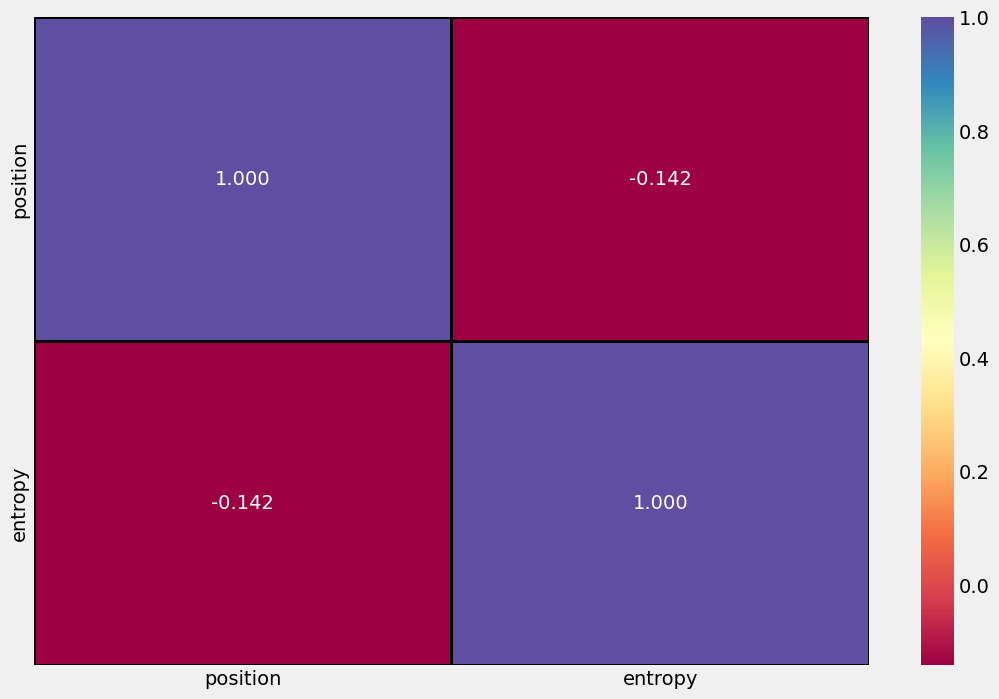

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



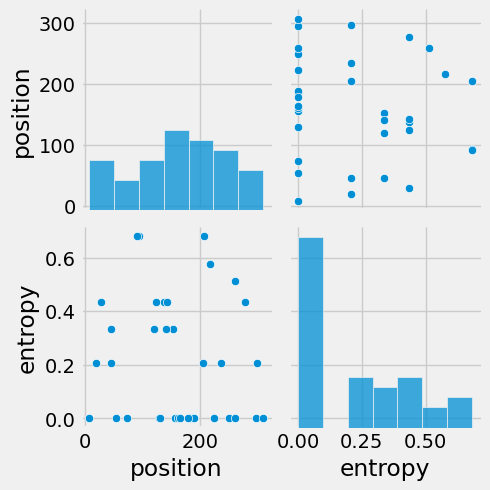

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



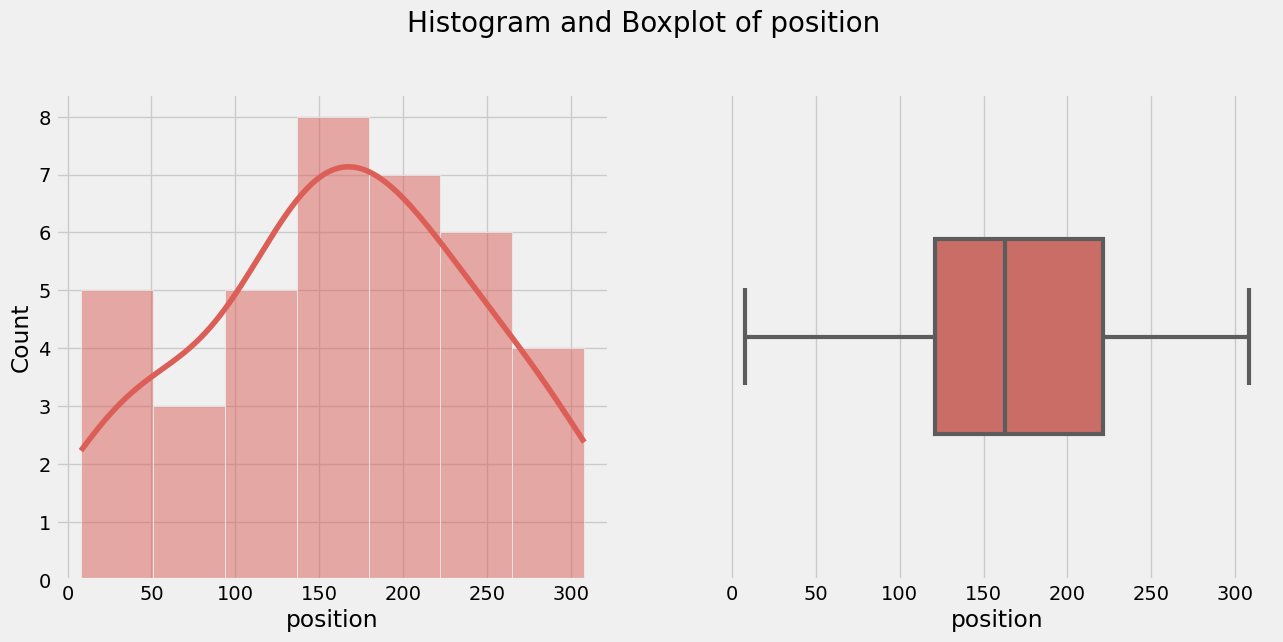

----------------------------------------------------------------------------------------------------
Countplot(s):



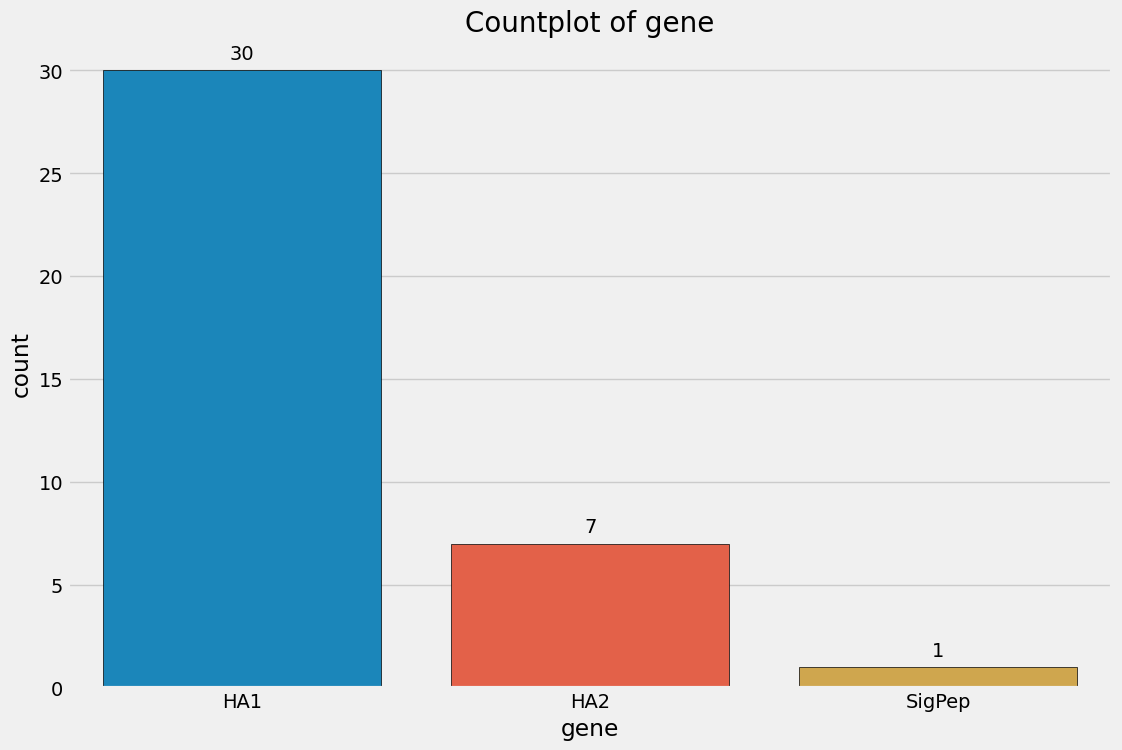

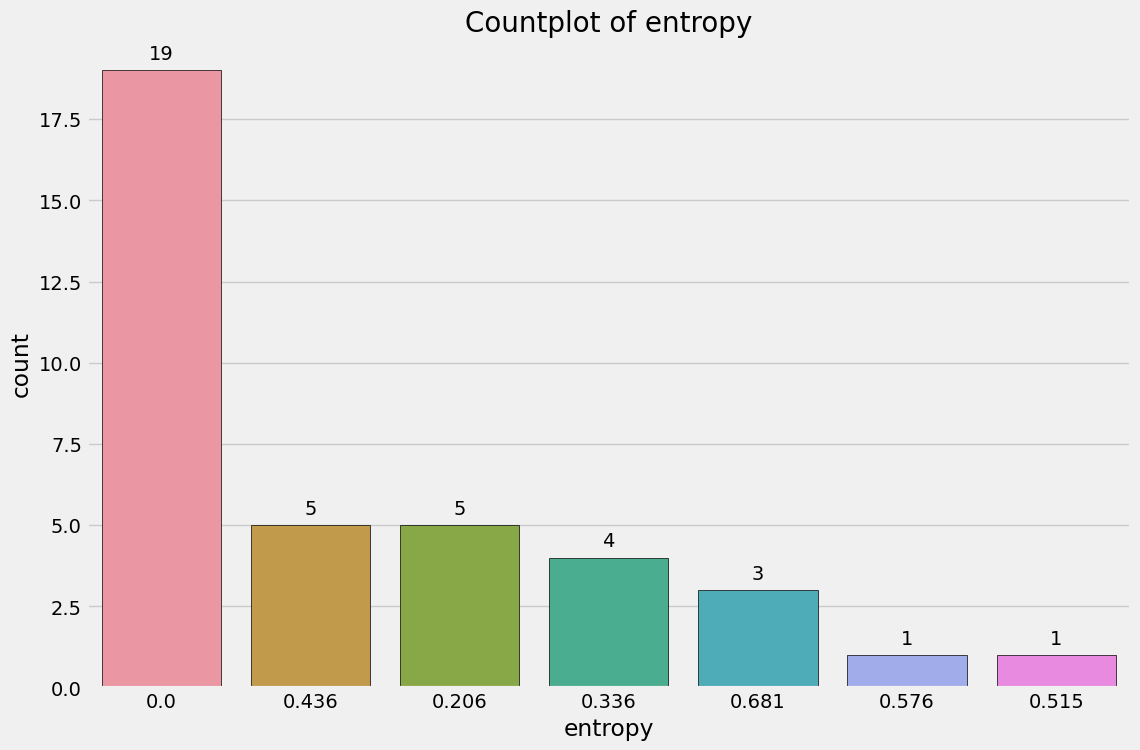

In [5]:
from fasteda import fast_eda
fast_eda(df)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Position Analysis</p></div>

* Describe the distribution of positions and their ranges.
* Identify any patterns or trends in the positions.


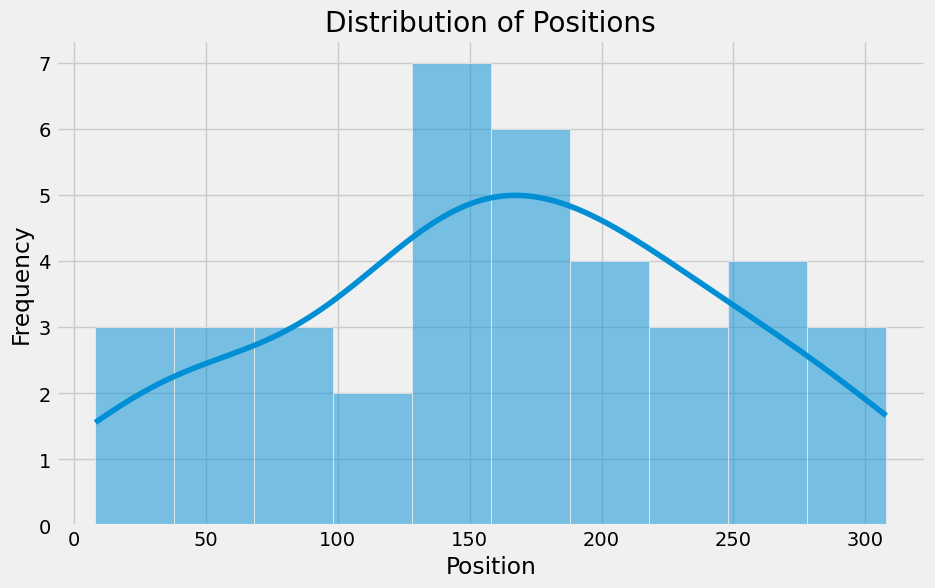

In [6]:
# create Seaborn plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='position', bins=10, kde=True)
plt.title("Distribution of Positions")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

* The distribution of positions in the dataset is fairly uniform, with a concentration of positions around the mid-range.
* The histogram plot shows a moderate distribution with a slight peak around position 100.
* This suggests that the positions are not clustered in a specific range, indicating a relatively even distribution of positions.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Entropy Values Analysis</p></div>

* Discuss the entropy values and their significance.,
* Analyze the range of entropy values and whether there are any outliers.,
* Investigate how entropy values relate to genes and positions.

Entropy Values Analysis:
count    38.000000
mean      0.202316
std       0.235218
min       0.000000
25%       0.000000
50%       0.103000
75%       0.411000
max       0.681000
Name: entropy, dtype: float64


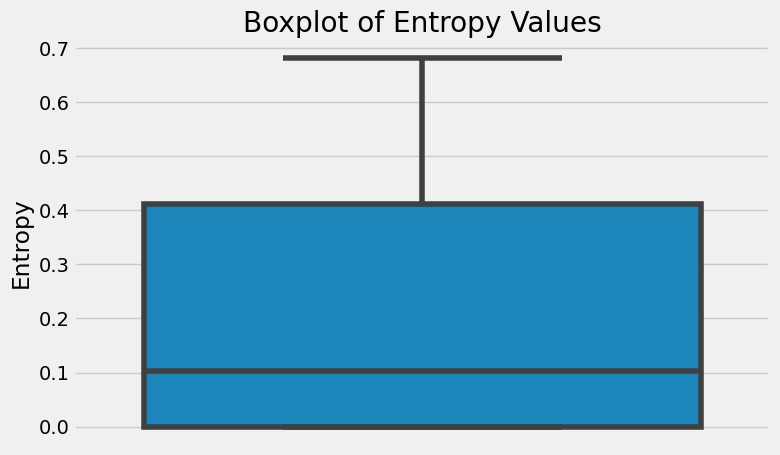

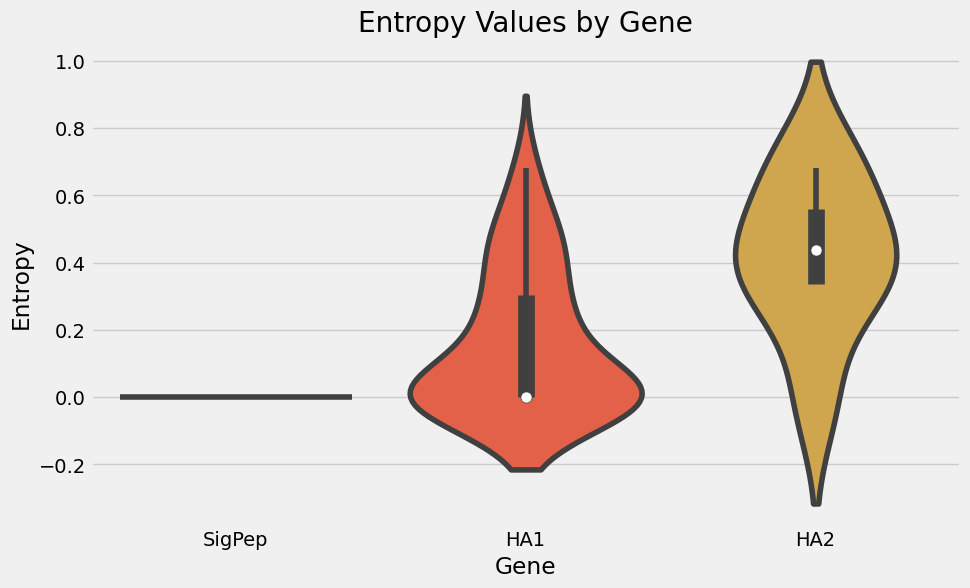

In [7]:
# Entropy Values Analysis
entropy_stats = df['entropy'].describe()
print("Entropy Values Analysis:")
print(entropy_stats)

# Check for outliers using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='entropy')
plt.title("Boxplot of Entropy Values")
plt.ylabel("Entropy")
plt.show()

# Create Seaborn violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='gene', y='entropy')
plt.title("Entropy Values by Gene")
plt.xlabel("Gene")
plt.ylabel("Entropy")
plt.show()

* Entropy values represent the randomness or unpredictability of the data.
* The statistics indicate a range of entropy values from 0.000 to 0.681.
* The boxplot suggests that the majority of values lie within the lower range of entropy.
* The violin plot provides insights into the distribution of entropy values by gene.
* Gene 'HA2' tends to have higher entropy values compared to other genes, particularly at positions 91, 124, and 206.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Gene-Position Relationship Analysis</p></div>

* Explore how genes are associated with specific positions.
* Visualize the relationship between genes, positions, and entropy values using appropriate plots.

In [8]:
df.fillna(value=0, inplace=True)

Gene-Position Relationship Analysis:
gene        HA1    HA2  SigPep
position                      
8           NaN    NaN     0.0
19        0.206    NaN     NaN
29          NaN  0.436     NaN
45        0.206  0.336     NaN
54        0.000    NaN     NaN
74        0.000    NaN     NaN
91          NaN  0.681     NaN
94        0.681    NaN     NaN
120       0.336    NaN     NaN
124         NaN  0.436     NaN
129       0.000    NaN     NaN
130       0.000    NaN     NaN
137       0.436    NaN     NaN
141         NaN  0.336     NaN
142       0.436    NaN     NaN
152       0.336    NaN     NaN
156       0.000    NaN     NaN
161       0.000    NaN     NaN
164       0.000    NaN     NaN
179         NaN  0.000     NaN
183       0.000    NaN     NaN
185       0.000    NaN     NaN
186       0.000    NaN     NaN
189       0.000    NaN     NaN
205       0.206    NaN     NaN
206         NaN  0.681     NaN
216       0.576    NaN     NaN
223       0.000    NaN     NaN
224       0.000    NaN     NaN
23

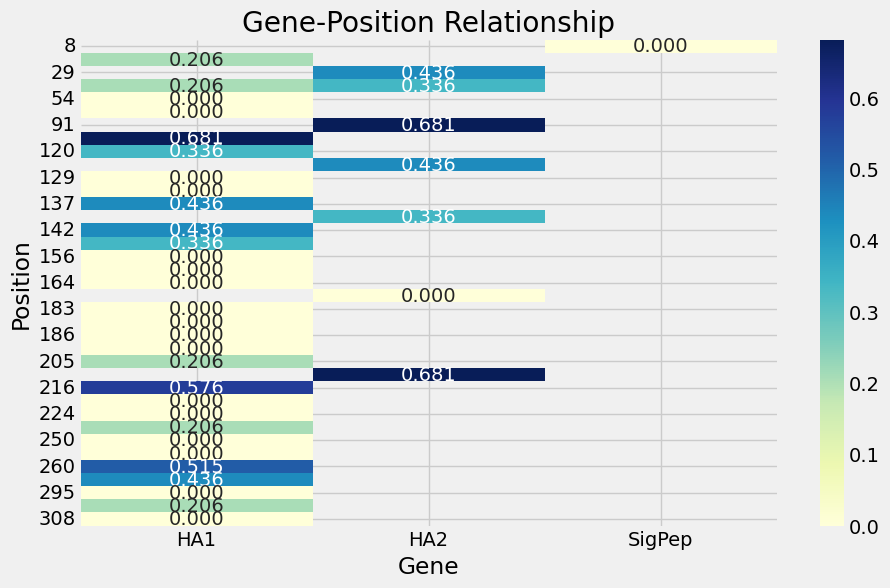

In [9]:
# Gene-Position Relationship Analysis
gene_position_pivot = df.pivot(index='position', columns='gene', values='entropy')

print("Gene-Position Relationship Analysis:")
print(gene_position_pivot)

# create Seaborn heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(data=gene_position_pivot, cmap='YlGnBu', annot=True, fmt=".3f")
plt.title("Gene-Position Relationship")
plt.xlabel("Gene")
plt.ylabel("Position")
plt.show()


* The heatmap plot provides a visual representation of the gene-position relationship.
* Each cell in the heatmap corresponds to a specific position and gene combination, with the color indicating the entropy value.
* We can observe that genes 'HA1' and 'HA2' have entropy values associated with various positions.
* Gene'HA1' has higher entropy values at positions 19 and 45, while 'HA2' has higher entropy values at positions 91, 124, and 206.


<div class="alert alert-block alert-info"> 📌 "Hey there! Your positive feedback and support for my notebook mean the world to me! It motivates me to create more valuable content. If you can spare a moment to give it an upvote, it would help others discover and benefit from it too. Together, let's foster a vibrant community of knowledge-sharing and empowerment. Thank you for considering it, and continued success on your learning journey!"😊</div>